## AccelerateAI - Python for Data Science - Assignment 07
### Multiple Linear Regression

In [103]:
## creating function to get model statistics
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

Q1. MLR Stepwise Regression – Household Expense
500 household were surveyed on their monthly expenses. The data is in the file
MLR_MonthlyExpense.

In [93]:
MLR_MonthlyExpense = pd.read_csv("C:\\Users\\theco\\MLR_MonthlyExpense.csv")

In [94]:
MLR_MonthlyExpense.head()

,Household,Monthly Payment,Family Size,Sector No,Rent,Own,Income,Utilities,Debt
0,1,"$1,585",2,2,0,1,"$96,709",$252,"$5,692"
1,2,"$1,314",6,2,1,0,"$77,470",$216,"$4,267"
2,3,$383,3,4,1,0,"$65,746",$207,"$2,903"
3,4,"$1,002",1,1,0,1,"$56,610",$249,"$3,896"
4,5,$743,3,3,1,0,"$59,185",$217,"$3,011"


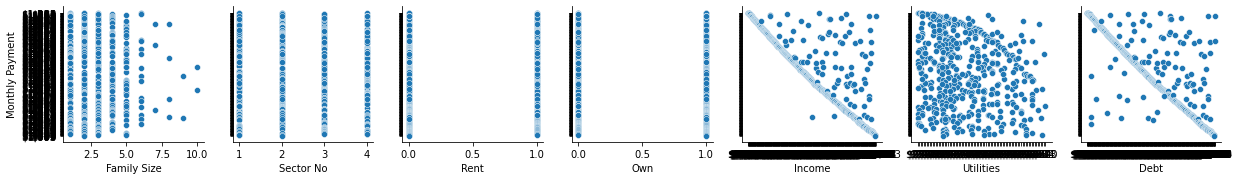

In [75]:
# Lets look at relationship of Monthly Payment with the numerical predictors
sns.pairplot(MLR_MonthlyExpense,     
             x_vars=["Family Size", "Sector No", "Rent", "Own", "Income", "Utilities", "Debt"],
             y_vars=["Monthly Payment"])

In [95]:
X = MLR_MonthlyExpense.drop(["Household", "Rent"], axis=1)

In [96]:
X.head()

,Monthly Payment,Family Size,Sector No,Own,Income,Utilities,Debt
0,"$1,585",2,2,1,"$96,709",$252,"$5,692"
1,"$1,314",6,2,0,"$77,470",$216,"$4,267"
2,$383,3,4,0,"$65,746",$207,"$2,903"
3,"$1,002",1,1,1,"$56,610",$249,"$3,896"
4,$743,3,3,0,"$59,185",$217,"$3,011"


In [ ]:
# Make salary  numeric datatype
MLR_MonthlyExpense["Monthly Payment"] = MLR_MonthlyExpense["Monthly Payment"].apply(lambda x: int(x.replace('$','').replace(',',''))) 

In [98]:
# Make salary  numeric datatype
MLR_MonthlyExpense["Income"] = MLR_MonthlyExpense["Income"].apply(lambda x: int(x.replace('$','').replace(',',''))) 

In [99]:
# Make salary  numeric datatype
MLR_MonthlyExpense["Utilities"] = MLR_MonthlyExpense["Utilities"].apply(lambda x: int(x.replace('$','').replace(',',''))) 

In [100]:
# Make salary  numeric datatype
MLR_MonthlyExpense["Debt"] = MLR_MonthlyExpense["Debt"].apply(lambda x: int(x.replace('$','').replace(',',''))) 

In [101]:
# Check for correlation among X variables
X.corr()

,Family Size,Sector No,Own
Family Size,1.000000,-0.010207,-0.025489
Sector No,-0.010207,1.000000,-0.386410
Own,-0.025489,-0.386410,1.000000


None of the variables seem to be strongly correlated

In [114]:
## getting column names
x_columns = ["Family Size", "Sector No", "Rent", "Own", "Income", "Utilities", "Debt"]
y = MLR_MonthlyExpense["Monthly Payment"]

In [115]:
def get_stats():
    x = MLR_MonthlyExpense[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())

In [116]:
get_stats()

                            OLS Regression Results                            
Dep. Variable:        Monthly Payment   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     80.27
Date:                Mon, 12 Sep 2022   Prob (F-statistic):           8.28e-70
Time:                        18:08:18   Log-Likelihood:                -3474.3
No. Observations:                 500   AIC:                             6963.
Df Residuals:                     493   BIC:                             6992.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Family Size   -49.2231     12.533     -3.927      

If we choose alpha to be 0.05, coefficients having a p-value of 0.05 or less would be statistically significant.
In other words, we would generally want to drop variables with a p-value greater than 0.05. Hence we would drop "Utilities" with p-value of 0.915

In [108]:
x_columns.remove("Utilities")
get_stats()

                            OLS Regression Results                            
Dep. Variable:        Monthly Payment   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     96.51
Date:                Sun, 11 Sep 2022   Prob (F-statistic):           8.05e-71
Time:                        20:48:15   Log-Likelihood:                -3474.3
No. Observations:                 500   AIC:                             6961.
Df Residuals:                     494   BIC:                             6986.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Family Size   -50.2318      8.287     -6.061      

Finally, we find that there are 6 variables left, namely Family Size, Sector No, Rent, Own, Income, and Debt.
Since each of the p-values are below 0.05, all of these variables are said to be statistically significant.

In [110]:
y.head()

0    1585
1    1314
2     383
3    1002
4     743
Name: Monthly Payment, dtype: int64

In [119]:
# choose a Significance level of .05 and select the predictor with lowest p value - provided its p value is less than .05

x_opt = x # initializing the dataframe containing optional/trial variable(s)
pvalue_df = pd.DataFrame() # Blank dataframe to store p values
for i in x:
    x_opt=x[i]
    pvalue_df=pvalue_df.append(pd.DataFrame(zip([i],[float(results.pvalues)]),columns =['Predictor', 'pvalue']))
    print("extracted pvalue for {} is {}".format(i,float(results.pvalues)))
    print('adj R Sq. is',results.rsquared_adj)
    print('----------------------------------------------')

extracted pvalue for const is 1.0889934402299867e-128
adj R Sq. is 0.6884912746315566
----------------------------------------------
extracted pvalue for Monthly Payment is 1.0889934402299867e-128
adj R Sq. is 0.6884912746315566
----------------------------------------------
extracted pvalue for Family Size is 1.0889934402299867e-128
adj R Sq. is 0.6884912746315566
----------------------------------------------
extracted pvalue for Sector No is 1.0889934402299867e-128
adj R Sq. is 0.6884912746315566
----------------------------------------------
extracted pvalue for Own is 1.0889934402299867e-128
adj R Sq. is 0.6884912746315566
----------------------------------------------
extracted pvalue for Income is 1.0889934402299867e-128
adj R Sq. is 0.6884912746315566
----------------------------------------------
extracted pvalue for Utilities is 1.0889934402299867e-128
adj R Sq. is 0.6884912746315566
----------------------------------------------
extracted pvalue for Debt is 1.088993440229986

### Q2. MLR Feature Selection – Box Office Revenue Prediction
An industry analyst is interested in building a predictive model to understand the impact
of various factors and opening week revenue numbers in the overall collections of a
movie (Total revenue).

In [127]:
MLR_MovieBoxOffice = pd.read_csv("C:\\Users\\theco\\MLR_MovieBoxOffice_data.csv")

In [128]:
MLR_MovieBoxOffice.head()

,movie_name,revenue_total,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,movie_genre,runtime,movie_director,release_month,release_year
0,Angrezi Medium,9.36,4.03,9.03,9.36,Drama,145,Homi Adajania,Mar,2020
1,Baaghi 3,93.37,17.50,53.83,90.67,Action,147,Ahmed Khan,Mar,2020
2,Thappad,30.61,3.07,14.66,22.79,Drama,142,Anubhav Sinha,Feb,2020
3,Shubh Mangal Zyada Saavdhan,62.78,9.55,32.66,44.84,Comedy,120,Hitesh Kewalya,Feb,2020
4,Bhoot: Part One - The Haunted Ship,31.97,5.10,16.36,24.18,Horror,117,Bhanu Pratap Singh,Feb,2020


In [129]:
# split the dataframe into dependent and independent variables.
x = MLR_MovieBoxOffice[['movie_name', 'revenue_opening_day', 'revenue_opening_weekend', 'revenue_firstweek','movie_genre', 'runtime', 'movie_director', 'release_month', 'release_year']]
y = MLR_MovieBoxOffice['revenue_total']
x.head()

,movie_name,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,movie_genre,runtime,movie_director,release_month,release_year
0,Angrezi Medium,4.03,9.03,9.36,Drama,145,Homi Adajania,Mar,2020
1,Baaghi 3,17.50,53.83,90.67,Action,147,Ahmed Khan,Mar,2020
2,Thappad,3.07,14.66,22.79,Drama,142,Anubhav Sinha,Feb,2020
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,Comedy,120,Hitesh Kewalya,Feb,2020
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,Horror,117,Bhanu Pratap Singh,Feb,2020


In [130]:
y.head()

0     9.36
1    93.37
2    30.61
3    62.78
4    31.97
Name: revenue_total, dtype: float64

In [138]:
# since the state is a string datatype column we need to encode it.
x = pd.get_dummies(x,drop_first=True)
x.head()

,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,runtime,release_year,movie_name_1921,movie_name_2,movie_name_Aiyaary,movie_name_Aksar 2,movie_name_Amavas,...,release_month_Dec,release_month_Feb,release_month_Jan,release_month_Jul,release_month_Jun,release_month_Mar,release_month_May,release_month_Nov,release_month_Oct,release_month_Sep
0,4.03,9.03,9.36,145,2020,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,17.50,53.83,90.67,147,2020,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3.07,14.66,22.79,142,2020,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,9.55,32.66,44.84,120,2020,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,5.10,16.36,24.18,117,2020,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [143]:
x.corr()

,revenue_opening_day,revenue_opening_weekend,revenue_firstweek,runtime,release_year,movie_name_1921,movie_name_2,movie_name_Aiyaary,movie_name_Aksar 2,movie_name_Amavas,...,release_month_Dec,release_month_Feb,release_month_Jan,release_month_Jul,release_month_Jun,release_month_Mar,release_month_May,release_month_Nov,release_month_Oct,release_month_Sep
revenue_opening_day,1.000000,0.972230,0.933651,0.514162,0.050217,-0.062146,0.099322,-0.046596,-0.068712,-0.069144,...,0.123883,-0.058263,-0.074967,-0.025673,0.273695,0.004455,-0.100952,-0.014731,0.052539,-0.151230
revenue_opening_weekend,0.972230,1.000000,0.973736,0.501872,0.052027,-0.067027,0.170677,-0.052933,-0.076556,-0.077630,...,0.130669,-0.066332,-0.031704,-0.007273,0.300327,-0.004008,-0.100401,-0.038131,0.038221,-0.142122
revenue_firstweek,0.933651,0.973736,1.000000,0.493948,0.046710,-0.065172,0.163220,-0.057046,-0.076362,-0.080728,...,0.188090,-0.079379,-0.024858,-0.011335,0.292870,-0.004147,-0.096258,-0.066199,0.063251,-0.132896
runtime,0.514162,0.501872,0.493948,1.000000,-0.001567,0.038794,0.049411,0.123731,-0.104539,-0.014292,...,0.154930,-0.051906,-0.048913,-0.007437,0.111276,-0.016516,-0.210537,-0.173152,0.126088,0.000893
release_year,0.050217,0.052027,0.046710,-0.001567,1.000000,-0.047442,-0.047442,-0.047442,-0.151976,0.057092,...,-0.108731,0.284193,0.254731,0.009763,0.033304,0.112129,0.032934,-0.179614,-0.108731,-0.280365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
release_month_Mar,0.004455,-0.004008,-0.004147,-0.016516,0.112129,-0.028077,-0.028077,-0.028077,-0.028077,-0.028077,...,-0.101695,-0.110786,-0.110786,-0.056819,-0.076076,1.000000,-0.086972,-0.106299,-0.101695,-0.115172
release_month_May,-0.100952,-0.100401,-0.096258,-0.210537,0.032934,-0.024012,-0.024012,-0.024012,-0.024012,-0.024012,...,-0.086972,-0.094747,-0.094747,-0.048593,-0.065062,-0.086972,1.000000,-0.090909,-0.086972,-0.098498
release_month_Nov,-0.014731,-0.038131,-0.066199,-0.173152,-0.179614,-0.029348,0.264135,-0.029348,0.264135,-0.029348,...,-0.106299,-0.115801,-0.115801,-0.059391,-0.079520,-0.106299,-0.090909,1.000000,-0.106299,-0.120386
release_month_Oct,0.052539,0.038221,0.063251,0.126088,-0.108731,-0.028077,-0.028077,-0.028077,-0.028077,-0.028077,...,-0.101695,-0.110786,-0.110786,-0.056819,-0.076076,-0.101695,-0.086972,-0.106299,1.000000,-0.115172


In [144]:
# Check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.Series([variance_inflation_factor(x.values, i) 
               for i in range(x.shape[1])], 
               index=x.columns)

revenue_opening_day        inf
revenue_opening_weekend    inf
revenue_firstweek          inf
runtime                    inf
release_year               inf
                          ... 
release_month_Mar          inf
release_month_May          inf
release_month_Nov          inf
release_month_Oct          inf
release_month_Sep          inf
Length: 275, dtype: float64

### Q3. MLR – Feature Selection – Building Energy Efficiency
A study looked into assessing the heating load and cooling load requirements of
buildings (that is, energy efficiency) as a function of building parameters. We perform
energy analysis using 12 different building shapes. The dataset comprises 768 samples
and 8 features, aiming to predict two real valued responses (heating load and cooling
load).

In [150]:
MLR_BuildingEfficiency = pd.read_csv("C:\\Users\\theco\\MLR_BuildingEfficiency.csv")

In [151]:
MLR_BuildingEfficiency.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [155]:
X = MLR_BuildingEfficiency.drop(["Overall_Height", "Glazing_Area","Glazing_Area_Distribution", "Heating_Load", "Cooling_Load"], axis=1)

In [156]:
X.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Orientation
0,0.98,514.5,294.0,110.25,2
1,0.98,514.5,294.0,110.25,3
2,0.98,514.5,294.0,110.25,4
3,0.98,514.5,294.0,110.25,5
4,0.90,563.5,318.5,122.50,2


In [157]:
X.corr()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Orientation
Relative_Compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,4.678592e-17
Surface_Area,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-3.459372e-17
Wall_Area,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,-2.429499e-17
Roof_Area,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-5.830058e-17
Orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,1.000000e+00


In [158]:
# Fit an OLS model
Y = MLR_BuildingEfficiency["Heating_Load"]
X1 = sm.add_constant(X)

model1 = sm.OLS(Y, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           Heating_Load   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     903.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          1.22e-287
Time:                        05:52:39   Log-Likelihood:                -2193.8
No. Observations:                 768   AIC:                             4398.
Df Residuals:                     763   BIC:                             4421.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  266.6230 

In [ ]:
The Relative_Compactness, Surface_Area, Wall_Area, and Roof_Area have p-values less than 0.05. Hence, these factors have
significant effect on the Heating_Load.

In [159]:
# Fit an OLS model
Y = MLR_BuildingEfficiency["Cooling_Load"]
X1 = sm.add_constant(X)

model1 = sm.OLS(Y, X1).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:           Cooling_Load   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     897.9
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          8.49e-287
Time:                        05:58:17   Log-Likelihood:                -2150.5
No. Observations:                 768   AIC:                             4311.
Df Residuals:                     763   BIC:                             4334.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  283.0180 

In [ ]:
The Relative_Compactness, Surface_Area, Wall_Area, and Roof_Area have p-values less than 0.05. Hence, these factors have
significant effect on the Cooling_Load.